Memvisualisasikan prediksi dari model klasifikasi menggunakan Metode Convolutional Neural Network (CNN)

In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
%matplotlib inline

from PIL import Image

In [3]:
import tensorflow as tf

tf.keras.backend.clear_session()

print(tf.__version__)

2.15.0


In [4]:
a = np.array([[1, 0], [0, 1], [2, 3]])
b = np.array([[4, 1, 1], [2, 2, 1]])
print(np.matrix(a))
print('------')
print(np.matrix(b))

[[1 0]
 [0 1]
 [2 3]]
------
[[4 1 1]
 [2 2 1]]


In [5]:
c = tf.matmul(a, b)
print(c)
d = np.dot(a, b)
print(d)

tf.Tensor(
[[ 4  1  1]
 [ 2  2  1]
 [14  8  5]], shape=(3, 3), dtype=int64)
[[ 4  1  1]
 [ 2  2  1]
 [14  8  5]]


In [6]:
a = [[1, 0], [0, 1]]
ones = np.ones((len(a),1))
a = np.append(a, ones, axis=1)
a

array([[1., 0., 1.],
       [0., 1., 1.]])

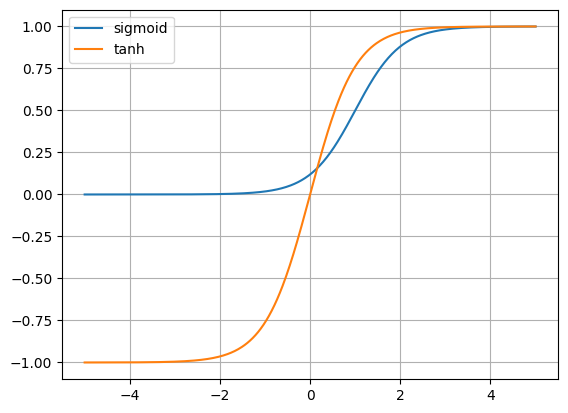

In [7]:
def sigmoid(x,c,a):
    z = ((x-c)/a)
    return 1.0 / (1.0 + np.exp(-z))

x = np.linspace(-5.0, 5.0, 500)
c = 1.
a = 0.5
plt.plot(x, sigmoid(x, c, a), label='sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.grid();
plt.legend();

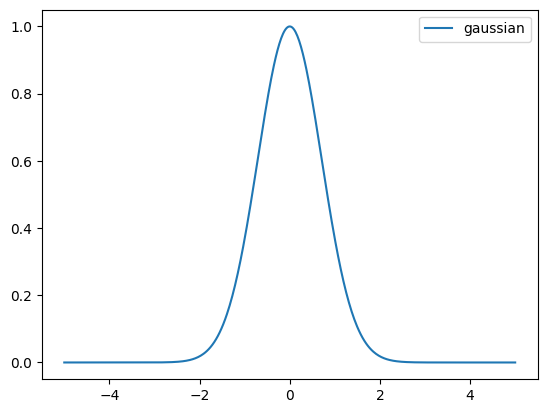

In [8]:
x = np.linspace(-5.0, 5.0, 500)
def gaussian(x):
    return np.exp(-x*x)

f = gaussian(x)
plt.plot(x, f, label='gaussian')
plt.legend()

4422102/4422102 [==============================] - 0s 0us/step


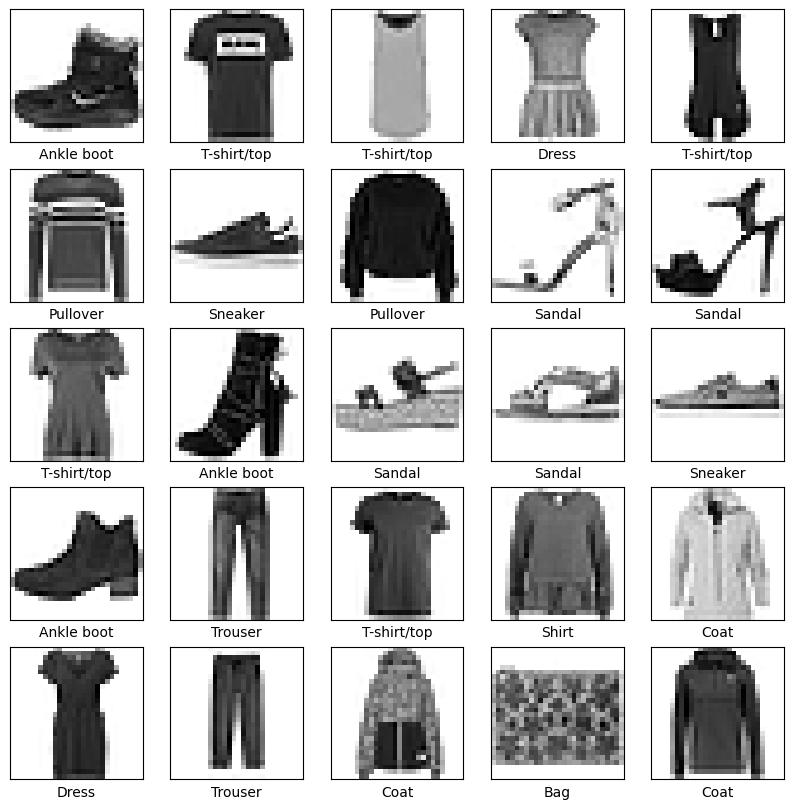

CPU times: user 2.51 s, sys: 462 ms, total: 2.97 s
Wall time: 5.43 s


In [9]:
%%time

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

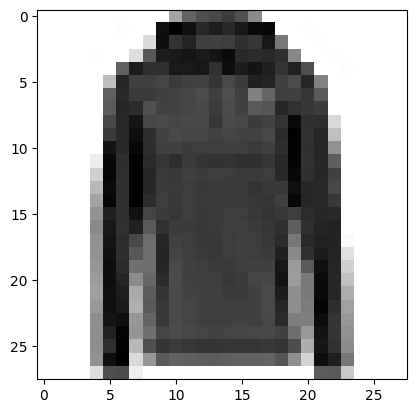

In [10]:
plt.imshow(x_train[24], cmap=plt.cm.binary)

In [11]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
y_train.shape

(60000,)

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(154, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 154)               120890    
                                                                 
 dense_1 (Dense)             (None, 64)                9920      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 131460 (513.52 KB)
Trainable params: 131460 (513.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


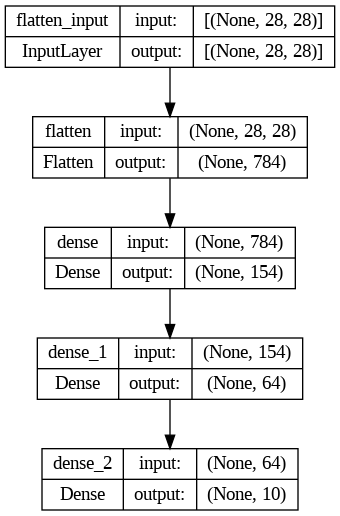

In [16]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [17]:
%%time

history = model.fit(x_train, y_train, validation_split=0.33, epochs=50,
                    verbose=2)

Epoch 1/50
1257/1257 - 17s - loss: 0.5253 - accuracy: 0.8151 - val_loss: 0.4210 - val_accuracy: 0.8495 - 17s/epoch - 14ms/step
Epoch 2/50
1257/1257 - 9s - loss: 0.3888 - accuracy: 0.8569 - val_loss: 0.4015 - val_accuracy: 0.8542 - 9s/epoch - 7ms/step
Epoch 3/50
1257/1257 - 8s - loss: 0.3454 - accuracy: 0.8739 - val_loss: 0.3582 - val_accuracy: 0.8702 - 8s/epoch - 6ms/step
Epoch 4/50
1257/1257 - 7s - loss: 0.3222 - accuracy: 0.8801 - val_loss: 0.3497 - val_accuracy: 0.8710 - 7s/epoch - 5ms/step
Epoch 5/50
1257/1257 - 5s - loss: 0.3040 - accuracy: 0.8869 - val_loss: 0.3405 - val_accuracy: 0.8753 - 5s/epoch - 4ms/step
Epoch 6/50
1257/1257 - 6s - loss: 0.2874 - accuracy: 0.8929 - val_loss: 0.3285 - val_accuracy: 0.8815 - 6s/epoch - 5ms/step
Epoch 7/50
1257/1257 - 5s - loss: 0.2734 - accuracy: 0.8972 - val_loss: 0.3115 - val_accuracy: 0.8885 - 5s/epoch - 4ms/step
Epoch 8/50
1257/1257 - 5s - loss: 0.2626 - accuracy: 0.9020 - val_loss: 0.3395 - val_accuracy: 0.8841 - 5s/epoch - 4ms/step
Epoch

In [18]:
model.save('fashion_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy={test_accuracy}')

Test accuracy=0.8838000297546387


In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


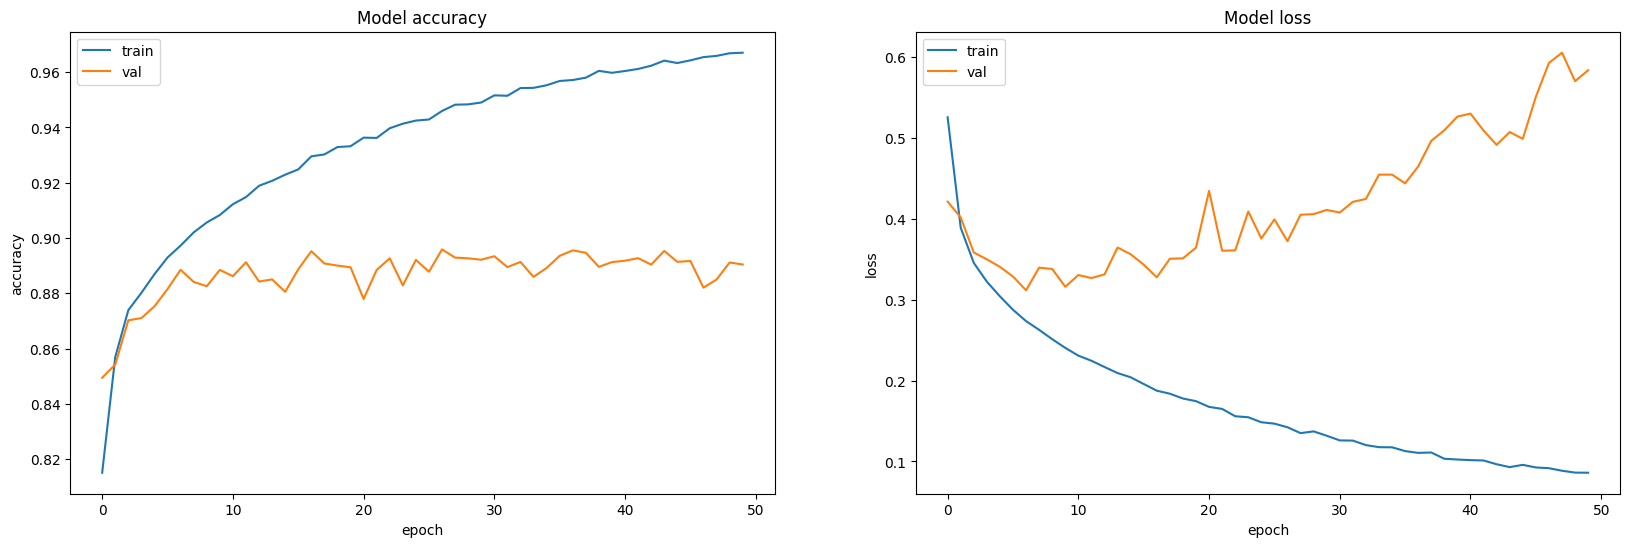

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

In [22]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [23]:
predictions[1]

array([2.8637805e-15, 5.5893368e-27, 9.9999958e-01, 8.2210650e-24,
       3.4806365e-07, 4.9557251e-15, 5.6510714e-08, 1.0534620e-22,
       2.3565625e-15, 1.5749116e-25], dtype=float32)

In [24]:
np.argmax(predictions[1]), class_names[np.argmax(predictions[1])]

(2, 'Pullover')

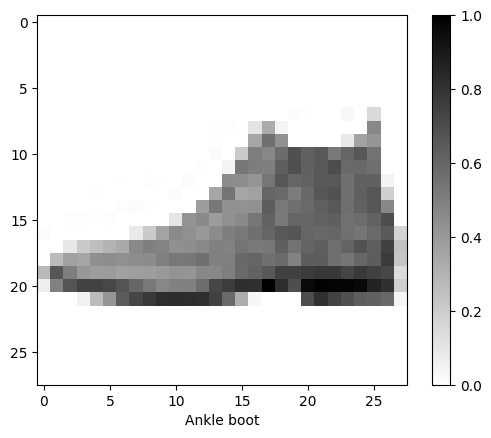

In [25]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[0]])
plt.colorbar()

In [26]:
# code source: https://www.tensorflow.org/tutorials/keras/classification
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

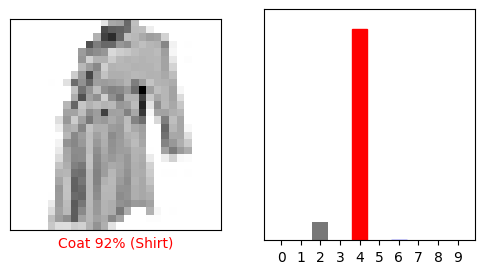

In [27]:
i = 406
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()